# Function edge

This is the function edge to calculate the intrinsic color and derive the fitted relation.  
This funtion is still under development, and will convert to a .py file when finished.

### Input
(teff, color): two numpy arrays for effective temperature and color. They should be pre-selected and classified.

### Output
(int_teff, int_color, rel_para): two numpy arrays for effective temperature in IC points and intrinsic color, and one numpy array for fitted parameters.

In [1]:
from astropy.io import fits
import numpy as np
import math
import matplotlib.pyplot as plt
import time
%matplotlib inline

data_main_path = '../data/OBIC/'

In [2]:
# Read the fits file.
apogee_fits = fits.open(data_main_path + 'allStar-l30e.2.fits')
apogee_tbl = apogee_fits[1].data

In [3]:
# Filtering data (should be recorded and discussed!)

# For programming, only teff and logg > 0 is now required.
apogee_tbl_fil = apogee_tbl[np.argwhere((apogee_tbl['teff'] > 0) & (apogee_tbl['logg'] > -3) & 
                                       (apogee_tbl['j'] > -1) & (apogee_tbl['h'] > -1) )]

In [4]:
# Determine the input numbers.

# Bin width, usually 50
bin_width = 50
# Ratio of the bluest edge, usually 5%
ratio = 5
# Low end criteria. If the number in a bin is lower than this number then neglect.  
low_crit = 100

In [6]:
# Find the start point and bin number of Teff. 
# Start point: the first number divisible by bin_width smaller than min(teff)
# Bin number: Start from start point and cover all the teff range.
teff_start = min(apogee_tbl_fil['teff']) - min(apogee_tbl_fil['teff']) % (bin_width/2)
bin_number = math.ceil((max(apogee_tbl_fil['teff']) - teff_start) / bin_width)

In [7]:
start_time = time.time()
int_teff = []
int_color = []
for i in range(bin_number):
    bin_tbl = apogee_tbl_fil[np.logical_and(apogee_tbl_fil['teff'] > teff_start+i*bin_width, \
                                            apogee_tbl_fil['teff'] < teff_start+(i+1)*bin_width)]
    if len(bin_tbl) < 100:
        continue
    source_num = 0
    while source_num != len(bin_tbl):
        source_num = len(bin_tbl)
        bin_mean = np.mean(bin_tbl['j']-bin_tbl['h'])
        bin_sigma = np.std(bin_tbl['j']-bin_tbl['h'])
        bin_tbl = bin_tbl[np.logical_or(bin_tbl['j']-bin_tbl['h'] < bin_mean+3*bin_sigma, \
                                  bin_tbl['j']-bin_tbl['h'] > bin_mean-3*bin_sigma)]
    int_teff.append(float(teff_start+(i+0.5)*bin_width))
    int_color.append(np.median(np.sort(bin_tbl['j']-bin_tbl['h'])[:math.ceil(len(bin_tbl)*ratio/100)]))
print(time.time() - start_time)

7.709553241729736


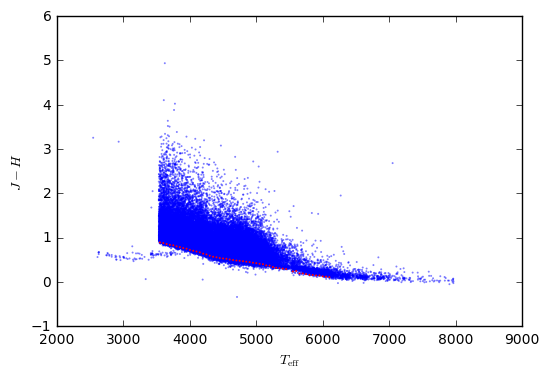

In [9]:
plt.scatter(apogee_tbl_fil['teff'], apogee_tbl_fil['j']-apogee_tbl_fil['h'], s=2, edgecolors='None', alpha=0.5)
plt.scatter(int_teff, int_color, c='r', edgecolors='None', s=2)
plt.xlabel('$T_\mathrm{eff}$'); plt.ylabel('$J-H$')
plt.savefig('figure/fig.png', dpi=200)
plt.show()